this snippet of script:

1. reads through all the excel files in a specific directory
2. reads through the "Close" column, which indicates the closing prices of stocks in corresponding dates in all the files
3. calculate the log return values and store it in a seperate column
4. rewrites and saves the excel files in the directory

Calculation of log return values are done by this code.

credit: helped by ChatGPT

In [9]:
import pandas as pd
import numpy as np
import os

def update_excel_with_log_returns(source_directory):
    # Iterate through each file in the directory
    for filename in os.listdir(source_directory):
        if filename.endswith(".xlsx"):
            file_path = os.path.join(source_directory, filename)
            
            try:
                # Load the Excel file
                df = pd.read_excel(file_path)
                
                # Ensure the 'Close' column exists
                if 'Close' in df.columns:
                    # Calculate log returns
                    df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1))
                    
                    # Save the updated DataFrame back to the same Excel file
                    df.to_excel(file_path, index=False)
                    print(f"Updated file {filename} successfully with log returns.")
                else:
                    print(f"'Close' column not found in {filename}")
            except Exception as e:
                print(f"Failed to process {filename}: {e}")

# Define the source directory where the Excel files are located
source_directory = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\common_dates_2'  # Update this with the actual directory

# Run the function
update_excel_with_log_returns(source_directory)


Updated file 21STCENMGM.NS_data_filtered.xlsx successfully with log returns.
Updated file 3IINFOLTD.NS_data_filtered.xlsx successfully with log returns.
Updated file 5PAISA.NS_data_filtered.xlsx successfully with log returns.
Updated file DCMSHRIRAM.NS_data_filtered.xlsx successfully with log returns.
Updated file DELPHIFX.NS_data_filtered.xlsx successfully with log returns.
Updated file DELTAMAGNT.NS_data_filtered.xlsx successfully with log returns.


This snippet of script:

1. reads through all the excel files in a particular directory
2. rename the files and save them in the same directory

This script is developed for the easeness of file handling for the next calculation and data storing processes. 

In [48]:
import os

def rename_files(directory):
    # Iterate over all files in the given directory
    for filename in os.listdir(directory):
        # Check if the file is an Excel file (you can adjust the conditions according to your needs)
        if filename.endswith('.xlsx') or filename.endswith('.xls'):
            # Find the position of the first period in the filename
            period_index = filename.find('.')
            if period_index != -1:
                # Create the new filename by slicing up to the first period and appending the extension
                new_filename = filename[:period_index] + filename[-5:]
                # Construct full old and new file paths
                old_file = os.path.join(directory, filename)
                new_file = os.path.join(directory, new_filename)
                # Rename the file
                os.rename(old_file, new_file)
                print(f"Renamed '{filename}' to '{new_filename}'")

# Example usage
directory_path = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\common_dates'  # Change this to your directory
rename_files(directory_path)

Renamed ' 21STCENMGM.NS_data_filtered.xlsx' to ' 21STCENMGM.xlsx'
Renamed ' 360ONE.NS_data_filtered.xlsx' to ' 360ONE.xlsx'
Renamed ' 3IINFOLTD.NS_data_filtered.xlsx' to ' 3IINFOLTD.xlsx'
Renamed ' 5PAISA.NS_data_filtered.xlsx' to ' 5PAISA.xlsx'
Renamed ' 63MOONS.NS_data_filtered.xlsx' to ' 63MOONS.xlsx'
Renamed ' AAATECH.NS_data_filtered.xlsx' to ' AAATECH.xlsx'
Renamed ' AARON.NS_data_filtered.xlsx' to ' AARON.xlsx'
Renamed ' AAVAS.NS_data_filtered.xlsx' to ' AAVAS.xlsx'
Renamed ' ABB.NS_data_filtered.xlsx' to ' ABB.xlsx'
Renamed ' ABCAPITAL.NS_data_filtered.xlsx' to ' ABCAPITAL.xlsx'
Renamed ' ACE.NS_data_filtered.xlsx' to ' ACE.xlsx'
Renamed ' ACEINTEG.NS_data_filtered.xlsx' to ' ACEINTEG.xlsx'
Renamed ' ADORWELD.NS_data_filtered.xlsx' to ' ADORWELD.xlsx'
Renamed ' ADSL.NS_data_filtered.xlsx' to ' ADSL.xlsx'
Renamed ' AIAENG.NS_data_filtered.xlsx' to ' AIAENG.xlsx'
Renamed ' AIRAN.NS_data_filtered.xlsx' to ' AIRAN.xlsx'
Renamed ' ALANKIT.NS_data_filtered.xlsx' to ' ALANKIT.xlsx'
Re

This snippet of code:

1. reads all the excel files stored in a specific directory
2. makes a dataframe containing the company labels under specific sectors
3. creates a dictonary where the keys are the sectors and the elements are the corresponding company labels

This code creates a sector to company map which has been used multiple times in data processing and network construction.

credit: help from ChatGPT

In [1]:
import pandas as pd
import os

def create_sector_company_dict(directory_path):
    sector_company_dict = {}

    # Loop over all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith('.xlsx') or filename.endswith('.xls'):
            # Determine the sector name by removing the file extension
            sector_name = os.path.splitext(filename)[0]
            file_path = os.path.join(directory_path, filename)

            # Try to read the 'symbol' column from the Excel file
            try:
                df = pd.read_excel(file_path, usecols=['symbol'])
                # Strip non-breaking spaces from company symbols
                df['symbol'] = df['symbol'].apply(lambda x: x.replace('\xa0', '') if isinstance(x, str) else x)
                # Store the list of cleaned company symbols in the dictionary under the sector key
                sector_company_dict[sector_name] = df['symbol'].dropna().tolist()
                #print(f"Processed sector: {sector_name}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    return sector_company_dict



# Example usage
directory_path = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Sector_and_companies'  # Replace with your actual directory path
sector_company_dict = create_sector_company_dict(directory_path)
print("Sector to Company mapping:")
print(sector_company_dict)

Sector to Company mapping:
{'Asset_Management': ['360ONE', 'ABSLAMC', 'CONSOFINVT', 'DHUNINV', 'HDFCAMC', 'IVC', 'NAGREEKCAP', 'NAM-INDIA', 'UTIAMC', 'WELINV'], 'Auto_Ancillaries': ['ASKAUTOLTD', 'ALICON', 'ASAHIINDIA', 'AUTOIND', 'AUTOLITIND', 'AUTOAXLES', 'ASAL', 'BANCOINDIA', 'BHARATGEAR', 'BOSCHLTD', 'CIEINDIA', 'DIVGIITTS', 'ENDURANCE', 'FIEMIND', 'FMGOETZE', 'GNA', 'GABRIEL', 'HAPPYFORGE', 'HINDCOMPOS', 'IGARASHI', 'IMPAL', 'INDNIPPON', 'JBMA', 'JMTAUTOLTD', 'JTEKTINDIA', 'JAMNAAUTO', 'JAYBARMARU', 'JMA', 'LUMAXTECH', 'LUMAXIND', 'MENONBE', 'MINDACORP', 'MUNJALAU', 'MUNJALSHOW', 'NDRAUTO', 'NRBBEARING', 'NIBL', 'OMAXAUTO', 'PPAP', 'PAVNAIND', 'PVSL', 'PRECAM', 'PRICOLLTD', 'PRITIKAUTO', 'RML', 'RBL', 'RANEENGINE', 'REMSONSIND', 'RICOAUTO', 'MOTHERSON', 'SANDHAR', 'SETCO', 'SHANTIGEAR', 'SHARDAMOTR', 'SHIVAMAUTO', 'SHRIPISTON', 'SINTERCOM', 'SONACOMS', 'SSWL', 'SUBROS', 'SUNDRMBRAK', 'SUNDRMFAST', 'SUPRAJIT', 'SWARAJENG', 'TVSHLTD', 'TALBROAUTO', 'HITECHGEAR', 'TIINDIA', 'UCAL', '

This snippet of script:

1. Goes throuh all the excel files stored in a specific directory
2. makes a dataframe with dates as index and log normal values of individual stocks as columns
3. calculates the cross corelation between each of the stocks
4. makes a nXn symmetric matrix and saves the matrix in an excel file with the stock names as index and headers
5. saves the excel file in a specific directory.

This code develops the cross correlation matrix.

In [49]:
import os
import pandas as pd

def calculate_and_save_cross_correlation(input_directory, output_directory, log_return_column='Log Return'):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    returns_dfs = []

    for filename in os.listdir(input_directory):
        if filename.endswith('.xlsx') or filename.endswith('.xls'):
            file_path = os.path.join(input_directory, filename)
            df = pd.read_excel(file_path, usecols=['Date', log_return_column])
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            returns_dfs.append(df[[log_return_column]].rename(columns={log_return_column: os.path.splitext(filename)[0]}))

    if not returns_dfs:
        print("No valid Excel files found in the input directory.")
        return

    # Combine all the DataFrames on Date using an outer join
    combined_df = pd.concat(returns_dfs, axis=1, join='outer')
    combined_df.dropna(inplace=True)

    correlation_matrix = combined_df.corr()

    # Save the cross-correlation matrix to an Excel file
    output_file_path = os.path.join(output_directory, 'cross_correlation_matrix.xlsx')
    correlation_matrix.to_excel(output_file_path)

    print("Cross-correlation matrix calculated and saved to:", output_file_path)
    return None

# Example usage
input_directory = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\common_dates'
output_directory = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\cross_corr_matrix'
calculate_and_save_cross_correlation(input_directory, output_directory)

Cross-correlation matrix calculated and saved to: C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\cross_corr_matrix\cross_correlation_matrix.xlsx


This snippet of script:

1. Goes throuh all the excel files stored in a specific directory
2. makes a dataframe with dates as index and log normal values of individual stocks as columns
3. calculates the spearman corelation between each of the stocks
4. makes a nXn symmetric matrix and saves the matrix in an excel file with the stock names as index and headers
5. saves the excel file in a specific directory.

This code develops the spearman correlation matrix.

In [50]:
import os
import pandas as pd


def calculate_and_save_cross_correlation(input_directory, output_directory, log_return_column='Log Return'):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    returns_dfs = []

    for filename in os.listdir(input_directory):
        if filename.endswith('.xlsx') or filename.endswith('.xls'):
            file_path = os.path.join(input_directory, filename)
            df = pd.read_excel(file_path, usecols=['Date', log_return_column])
            df['Date'] = pd.to_datetime(df['Date'])
            df.set_index('Date', inplace=True)
            returns_dfs.append(df[[log_return_column]].rename(columns={log_return_column: os.path.splitext(filename)[0]}))

    if not returns_dfs:
        print("No valid Excel files found in the input directory.")
        return

    # Combine all the DataFrames on Date using an outer join
    combined_df = pd.concat(returns_dfs, axis=1, join='outer')
    combined_df.dropna(inplace=True)

    correlation_matrix = combined_df.corr(method = 'spearman')

    # Save the cross-correlation matrix to an Excel file
    output_file_path = os.path.join(output_directory, 'spearman_correlation_matrix.xlsx')
    correlation_matrix.to_excel(output_file_path)

    print("Cross-correlation matrix calculated and saved to:", output_file_path)
    return None

# Example usage
input_directory = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\common_dates'
output_directory = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix'
calculate_and_save_spearman_correlation(input_directory, output_directory)

Spearman-correlation matrix calculated and saved to: C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\spearman_correlation_matrix.xlsx


This snippet of script:

1. Goes throuh all the excel files stored in a specific directory
2. makes a dataframe with dates as index and log normal values of individual stocks as columns
3. calculates the mutual information between each of the stocks
4. makes a nXn symmetric matrix and saves the matrix in an excel file with the stock names as index and headers
5. saves the excel file in a specific directory.

This code develops the mutual information matrix.

In [52]:
import os
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

def calculate_mutual_information(input_directory, output_directory, log_return_column='Log Return'):
    # Ensure the output directory exists, create it if not
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    data_frames = []
    stock_names = []
    
    for filename in os.listdir(input_directory):
        if filename.endswith('.xlsx') or filename.endswith('.xls'):
            file_path = os.path.join(input_directory, filename)
            try:
                stock_name = os.path.splitext(filename)[0]
                stock_names.append(stock_name)
                df = pd.read_excel(file_path, usecols=['Date', log_return_column])
                df.set_index('Date', inplace=True)  # Correctly setting index
                # Rename column after setting index
                df.rename(columns={log_return_column: stock_name}, inplace=True)
                data_frames.append(df)
            except Exception as e:
                print(f"Error processing {filename}: {e}")
                
    if not data_frames:
        print("No data processed.")
        return

    # Combine all data frames on Date index
    combined_df = pd.concat(data_frames, axis=1, join='outer')

    print(f"Shape of combined DataFrame before any filling: {combined_df.shape}")
    
    # Discretize the data
    est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
    try:
        discretized_data = est.fit_transform(combined_df.fillna(0))  # Handling NaN by replacing with zero
        discretized_df = pd.DataFrame(discretized_data, index=combined_df.index, columns=combined_df.columns)
        
        mi_results = pd.DataFrame(index=stock_names, columns=stock_names)
        
        for stock1 in stock_names:
            for stock2 in stock_names:
                if stock1 != stock2:
                    mi_value = mutual_info_score(discretized_df[stock1], discretized_df[stock2])
                    mi_results.at[stock1, stock2] = mi_value
                else:
                    mi_results.at[stock1, stock2] = np.nan
                    
        output_file_path = os.path.join(output_directory, 'mutual_information_results.xlsx')
        mi_results.to_excel(output_file_path)
        
        print(f"Mutual information results saved to {output_file_path}")
    except Exception as e:
        print(f"Discretization error: {e}")

# Example usage
input_directory = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\common_dates'
output_directory = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix'
calculate_mutual_information(input_directory, output_directory, log_return_column='Log Return')

Shape of combined DataFrame before any filling: (648, 454)
Mutual information results saved to C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\mutual_information_results.xlsx


This snippet of code:

1. loads one of the correlation matrix according to the given input directory path
2. create correlation network by MST method
3. calls the sector stock mapping dictionary for adding 'sector' attribute to the nodes
4. creates a gml file of the networkx object and saves it in a specific dictionary.

In [119]:
import pandas as pd
import networkx as nx
import os

def invert_sector_dict(sector_company_dict):
    stock_sector_map = {}
    for sector, stocks in sector_company_dict.items():
        for stock in stocks:
            stock_sector_map[stock] = sector
    #print(stock_sector_map)
    return stock_sector_map

def load_correlation_matrix(file_path):
    # Load the correlation matrix from an Excel file
    df = pd.read_excel(file_path, index_col=0)
    return df

def create_graph_from_correlation(df, stock_sector_map):
    G_MST = nx.Graph()
    # First, strip any whitespace from the index and columns of the DataFrame
    df.columns = df.columns.str.strip()
    df.index = df.index.str.strip()
    
    for i in df.index:
        for j in df.columns:
            if i != j:
                G_MST.add_edge(i, j, weight=1 - abs(df.loc[i, j]))

    # Add sector information as node attributes
    for node in G_MST.nodes():
        G_MST.nodes[node]['sector'] = stock_sector_map.get(node, 'Unknown')
    return G_MST

def save_to_gml(G_MST, output_dir):
    # Construct file path with current datetime for uniqueness
    filename = f"mutual_information_subset_mst_with_attributes.gml"
    file_path = os.path.join(output_dir, filename)
    # Save the graph to a GML file
    nx.write_gml(G_MST, file_path)
    print(f"Graph saved as {file_path}")

# Example usage


# Load the Excel file containing the correlation matrix
file_path = r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\subset_correlation_matrix.xlsx"
df = load_correlation_matrix(file_path)
output_dir = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix'  # Directory to save the GML file

# Invert the sector dictionary to map stocks to sectors
stock_sector_map = invert_sector_dict(sector_company_dict)

# Create the graph, compute MST, and save
G_MST = create_graph_from_correlation(df, stock_sector_map)
mst = nx.minimum_spanning_tree(G_MST, weight='weight')
#save_to_gml(mst, output_dir)  # Save MST with node attributes

This snippet of script:

1. Plots the degree distribution for the graphs produced by the MST method.

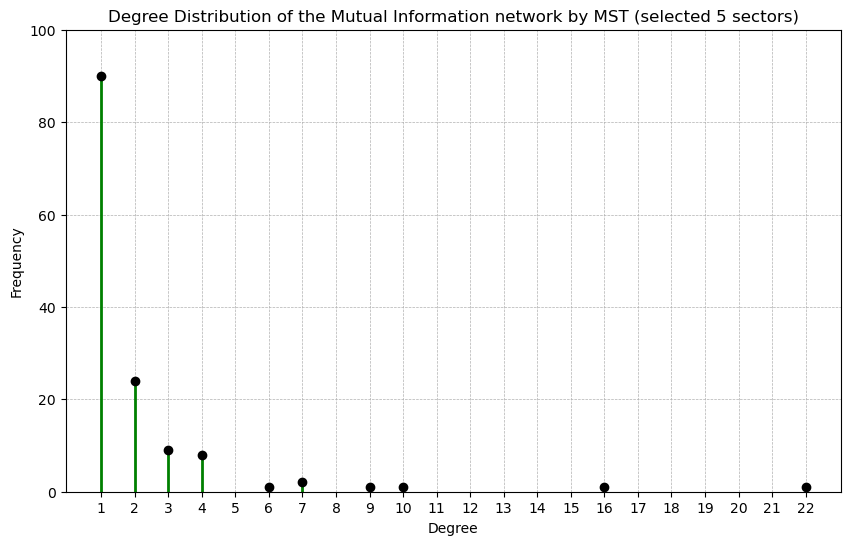

In [120]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_degree_distribution(mst):
    # Extracting the degrees from the graph
    degrees = [degree for node, degree in mst.degree()]
    degree_count = Counter(degrees)

    # Setting up the figure
    plt.figure(figsize=(10, 6))
    plt.ylim(0, 100)  # Adjust this based on your data if necessary
    plt.xticks(range(1, max(degrees) + 1))  # Ensure all degrees are shown

    # Plotting each degree count
    for deg, cnt in degree_count.items():
        plt.plot([deg, deg], [0, cnt], 'green', lw=2)  # the stem
        plt.plot(deg, cnt, 'o', color='black')  # the "head"

    # Adding labels and title for clarity
    plt.title("Degree Distribution of the Mutual Information network by MST (selected 5 sectors)")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
    plt.savefig(r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\Degree_distribution_mi_subset_mst.png")
    plt.show()


plot_degree_distribution(mst)

This snippet of code:

1. plots the degree distribution in Log-Log scale for the graphs produced by MST method.

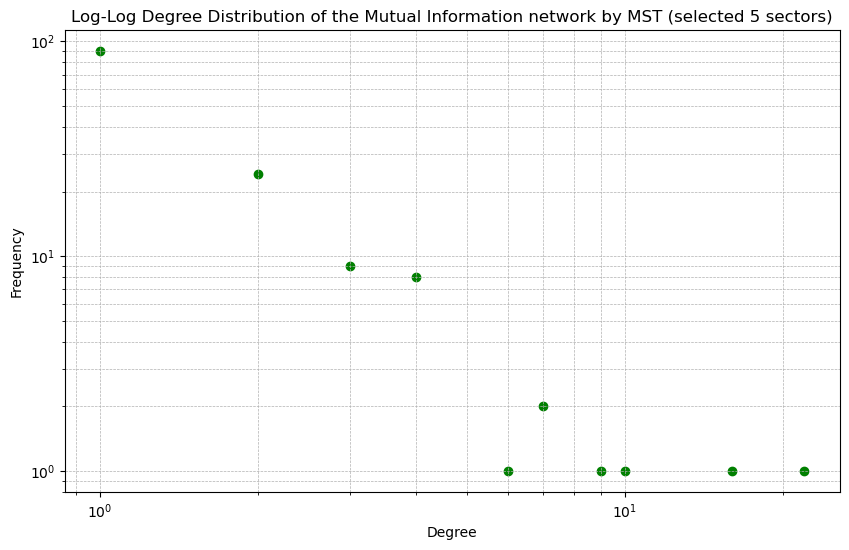

In [121]:
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx

def plot_degree_distribution_loglog(mst):
    """
    Plots the degree distribution of a graph on a log-log scale.

    Parameters:
    mst (nx.Graph): The graph from which to calculate degree distributions.
    """
    # Extracting the degrees from the graph
    degrees = [degree for node, degree in mst.degree()]
    degree_count = Counter(degrees)

    # Prepare data for plotting
    x = list(degree_count.keys())
    y = list(degree_count.values())

    # Setting up the figure
    plt.figure(figsize=(10, 6))

    # Use scatter plot for log-log scale
    plt.scatter(x, y, color='green')

    # Set log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Adding labels and title for clarity
    plt.title("Log-Log Degree Distribution of the Mutual Information network by MST (selected 5 sectors)")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability

    # Save the plot
    plt.savefig(r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\Degree_distribution_mi_subset_mst_loglog.png")

    # Show the plot
    plt.show()

# Example usage, assuming 'mst' is your graph
plot_degree_distribution_loglog(mst)

This snippet of code:

1. produces the community detection graph using Louvain method
2. saves the produced graph in an gml file
3. saves the divisions of communities and the stocks under them in an excel file in a specified directory.

C:\Users\anind\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


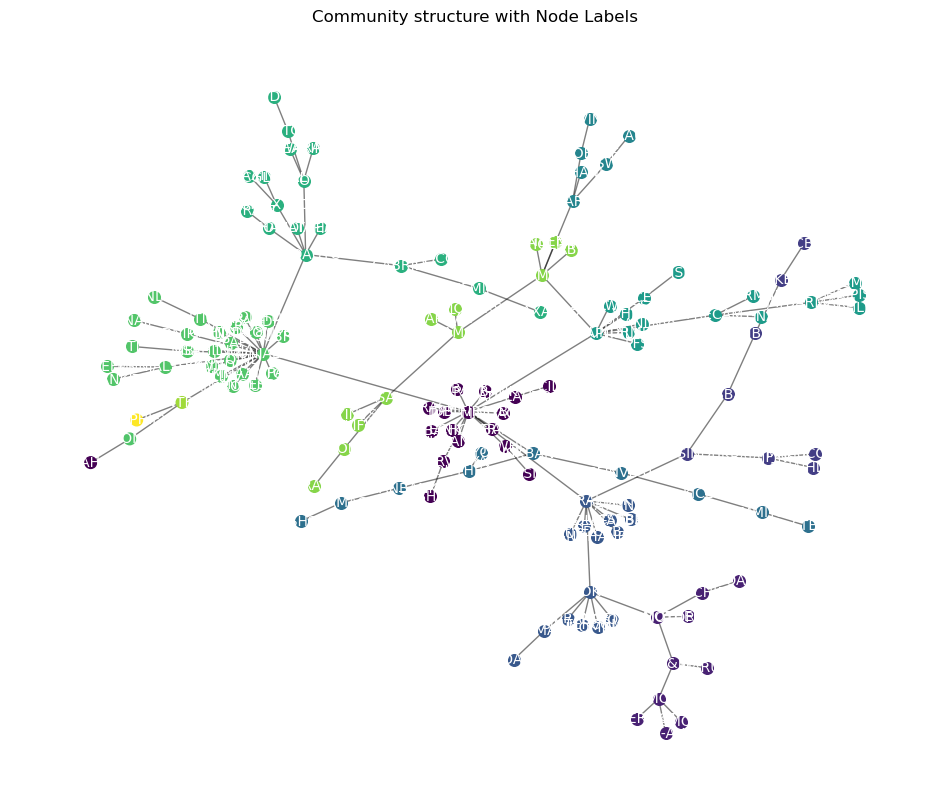

Graph saved as C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\mi_subset_mst_community_detection.gml
{0: ['ATULAUTO', 'IGARASHI', 'MINDACORP', 'TVSHLTD', 'HITECHGEAR', 'AUBANK', 'IDBI', 'IDFCFIRSTB', 'KTKBANK', 'KARURVYSYA', 'RBLBANK', 'UJJIVANSFB', 'YESBANK', 'JSWHL', 'NSIL', 'TFCILTD'], 1: ['BAJAJ-AUTO', 'HEROMOTOCO', 'TVSMOTOR', 'EICHERMOT', 'M&M', 'MARUTI', 'TATAMOTORS', 'AUTOAXLES', 'BOSCHLTD', 'MOTHERSON'], 2: ['MAHSCOOTER', 'AXISBANK', 'HDFCBANK', 'ICICIBANK', 'INDUSINDBK', 'KOTAKBANK', 'BAJAJFINSV', 'BAJAJHLDNG'], 3: ['ASHOKLEY', 'ESCORTS', 'ENDURANCE', 'JMA', 'SHARDAMOTR', 'SINTERCOM', 'UNOMINDA', 'BANDHANBNK', 'CSBBANK', 'CUB', 'DCBBANK', 'EQUITASBNK', 'FEDERALBNK', 'CREST', 'TATAINVEST'], 6: ['FORCEMOT', 'SMLISUZU', 'VSTTILLERS', 'GNA', 'JBMA', 'JAYBARMARU', 'PRECAM', 'SHRIPISTON', 'SUNDRMBRAK', 'SUNDRMFAST', 'ABCAPITAL', 'EDELWEISS', 'PFS', 'PILANIINV

In [122]:
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

def detect_and_plot_communities(G, save_gml=False, save_excel = False, filename="graph.gml"):
    """
    Detects communities in a graph using the Louvain method, plots the graph with nodes colored by community
    and with node labels, inverts the community dictionary, and optionally saves the graph to a GML file.

    Parameters:
    G (nx.Graph): A NetworkX graph.
    save_gml (bool): Whether to save the graph to a GML file.
    filename (str): Filename for the GML file.

    Returns:
    dict: An inverted dictionary of community labels with lists of their respective nodes.
    """
    # Detect communities
    partition = community_louvain.best_partition(G)

    # Add community information as node attribute for saving
    for node, community in partition.items():
        G.nodes[node]['community'] = community

    # Visualization setup
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)  # positions for all nodes

    # Color the nodes according to their partition
    cmap = plt.get_cmap('viridis')
    num_communities = len(set(partition.values()))
    colors = [cmap(i / num_communities) for i in range(num_communities)]

    for com in set(partition.values()):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size=70, node_color=colors[com])
    
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')  # Adding labels to nodes

    plt.title('Community structure with Node Labels')
    plt.axis('off')
    plt.show()

    # Inverting the partition dictionary to community: [nodes]
    community_dict = {}
    for node, com in partition.items():
        if com not in community_dict:
            community_dict[com] = []
        community_dict[com].append(node)

    # Save to GML file if requested
    if save_gml:
        try:
            nx.write_gml(G, filename)
            print(f"Graph saved as {filename}")
        except Exception as e:
            print(f"An error occurred while saving the graph: {e}")

    print(community_dict)

    if save_excel:
        excel_filename = filename.replace('.gml', '_communities.xlsx')
        # Create a DataFrame from the community dictionary
        df = pd.DataFrame.from_dict(community_dict, orient='index').transpose()
        # Save the DataFrame to an Excel file
        df.to_excel(excel_filename, index=False)
        print(f"Community data saved as {excel_filename}")
    return community_dict

# Example usage
communities = detect_and_plot_communities(mst, save_gml=True, save_excel=True, filename= r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\mi_subset_mst_community_detection.gml")

This snippet of code:

1. loads one of the correlation matrix according to the given input directory path
2. create correlation network by PMFG method
3. calls the sector stock mapping dictionary for adding 'sector' attribute to the nodes
4. creates a gml file of the networkx object and saves it in a specific dictionary.

In [160]:
""" For computational limit, use threshold of around 0.2 for the cross and spearmans correlation and 0.06 for the mutual information matrix"""


import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
from networkx.algorithms import planarity

def invert_sector_dict(sector_company_dict):
    stock_sector_map = {}
    for sector, stocks in sector_company_dict.items():
        for stock in stocks:
            stock_sector_map[stock] = sector
    #print(stock_sector_map)
    return stock_sector_map

def load_correlation_matrix(file_path):
    df = pd.read_excel(file_path, index_col=0)
    return df

def create_graph_from_correlation(df, threshold = 0.2):
    G_MP = nx.Graph()
    # First, strip any whitespace from the index and columns of the DataFrame
    df.columns = df.columns.str.strip()
    df.index = df.index.str.strip()
    
    for i in df.index:
        for j in df.columns:
            if i != j and abs(df.loc[i, j]) > threshold:
                G_MP.add_edge(i, j, weight=1 - abs(df.loc[i, j]))

    # Add sector information as node attributes
    for node in G_MP.nodes():
        G_MP.nodes[node]['sector'] = stock_sector_map.get(node, 'Unknown')
    return G_MP

def create_maximal_planar_graph(G_MP):
    # Create a maximal planar graph from the given graph
    MP = nx.Graph()
    
    # First, add all nodes to MP and preserve their attributes
    for node in G_MP.nodes(data=True):
        MP.add_node(node[0], **node[1])
    
    edges_sorted = sorted(G_MP.edges(data=True), key=lambda x: -x[2]['weight'])
    for edge in edges_sorted:
        MP.add_edge(edge[0], edge[1], weight=edge[2]['weight'])
        if not planarity.is_planar(MP):
            MP.remove_edge(edge[0], edge[1])
    return MP

def plot_network(G_MP):
    pos = nx.spring_layout(G_MP)
    weights = nx.get_edge_attributes(G_MP, 'weight')
    
    nx.draw_networkx_nodes(G_MP, pos, node_size=700)
    nx.draw_networkx_labels(G_MP, pos)
    nx.draw_networkx_edges(G_MP, pos, width=1.0, alpha=0.5)
    nx.draw_networkx_edge_labels(G_MP, pos, edge_labels={k: f"{v:.2f}" for k, v in weights.items()})
    
    plt.title("Network Graph")
    plt.axis('off')
    plt.show()

def save_to_gml(G_MP, output_dir, filename):
    file_path = os.path.join(output_dir, filename)
    nx.write_gml(G_MP, file_path)
    print(f"Graph saved as {file_path}")

# Path to the Excel file containing the correlation matrix
file_path = r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\spearman_correlation_matrix.xlsx"
output_dir = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix'

# Load, create graph, compute MST, and plot
df = load_correlation_matrix(file_path)
G_MP = create_graph_from_correlation(df)
MP = create_maximal_planar_graph(G_MP)

#save_to_gml(MP, output_dir, "cross_correlation_MP_with_attributes.gml")

This snippet of script:

1. Plots the degree distribution for the graphs produced by the MST method.

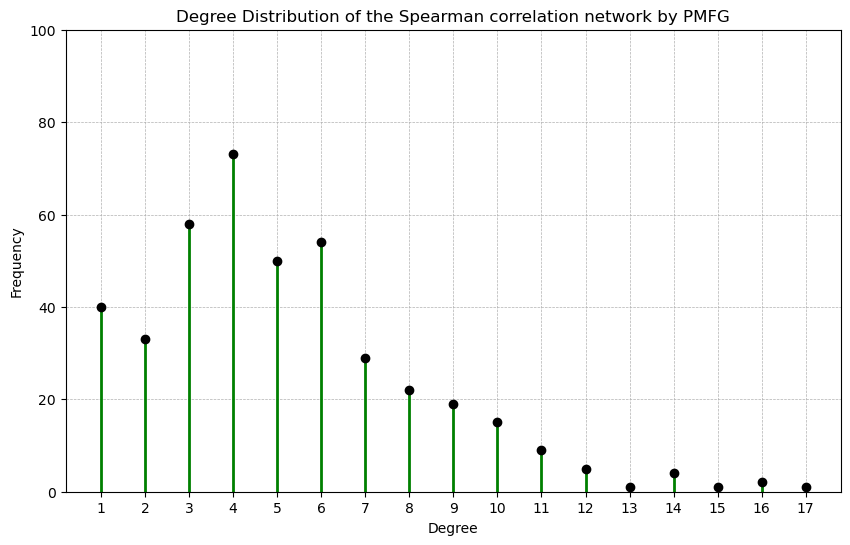

In [161]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_degree_distribution(G):
    # Extracting the degrees from the graph
    degrees = [degree for node, degree in MP.degree()]
    degree_count = Counter(degrees)

    # Setting up the figure
    plt.figure(figsize=(10, 6))
    plt.ylim(0, 100)  # Adjust this based on your data if necessary
    plt.xticks(range(1, max(degrees) + 1))  # Ensure all degrees are shown

    # Plotting each degree count
    for deg, cnt in degree_count.items():
        plt.plot([deg, deg], [0, cnt], 'green', lw=2)  # the stem
        plt.plot(deg, cnt, 'o', color='black')  # the "head"

    # Adding labels and title for clarity
    plt.title("Degree Distribution of the Spearman correlation network by PMFG")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
    # Save the plot
    plt.savefig(r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\Degree_distribution_spearman_MP.png")

    plt.show()


plot_degree_distribution(MP)

This snippet of code:

1. plots the degree distribution in Log-Log scale for the graphs produced by PMFG method.

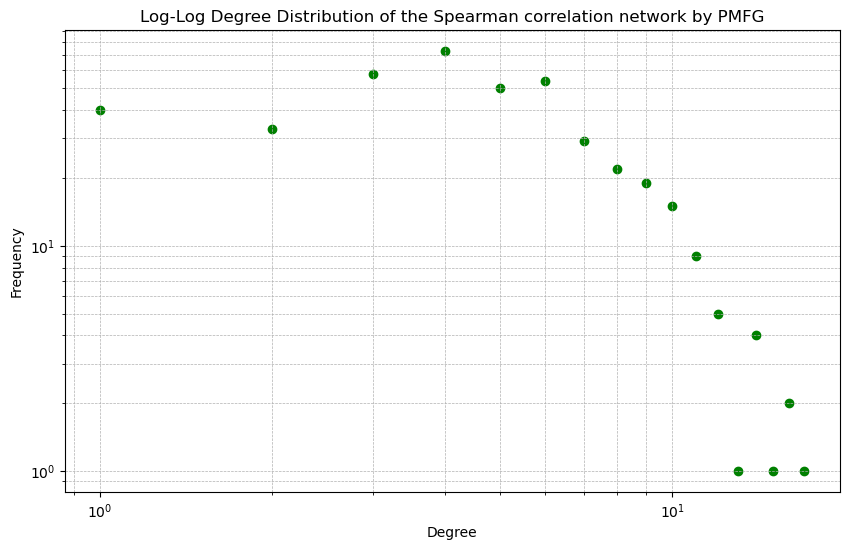

In [162]:
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx

def plot_degree_distribution_loglog(mst):
    """
    Plots the degree distribution of a graph on a log-log scale.

    Parameters:
    mst (nx.Graph): The graph from which to calculate degree distributions.
    """
    # Extracting the degrees from the graph
    degrees = [degree for node, degree in mst.degree()]
    degree_count = Counter(degrees)

    # Prepare data for plotting
    x = list(degree_count.keys())
    y = list(degree_count.values())

    # Setting up the figure
    plt.figure(figsize=(10, 6))

    # Use scatter plot for log-log scale
    plt.scatter(x, y, color='green')

    # Set log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Adding labels and title for clarity
    plt.title("Log-Log Degree Distribution of the Spearman correlation network by PMFG")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability

    # Save the plot
    plt.savefig(r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\Degree_spearman_MP_loglog.png")

    # Show the plot
    plt.show()

# Example usage, assuming 'mst' is your graph
plot_degree_distribution_loglog(MP)

This snippet of code:

1. calculates the clustering coefficients for each node
2. plots the distribution of clustering coefficients
3. saves the clustering coefficient values for each node in an excel file in a specific directory

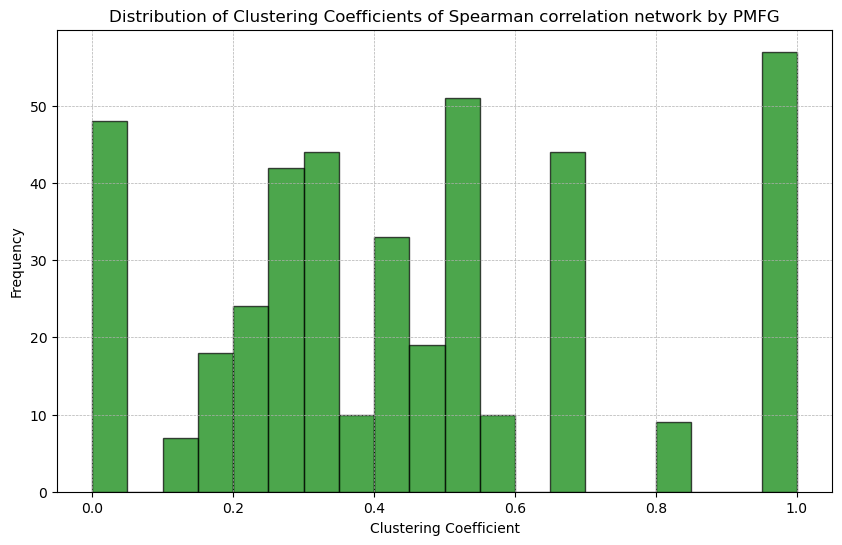

{'360ONE': 0,
 'KTKBANK': 0.6666666666666666,
 'RBL': 0.4,
 'RICOAUTO': 0.3055555555555556,
 '3IINFOLTD': 0.19444444444444445,
 'ABCAPITAL': 0.4,
 'ADSL': 0.15384615384615385,
 'AIRAN': 0.3333333333333333,
 'ALANKIT': 0,
 'ANKITMETAL': 0,
 'APOLLO': 0.8333333333333334,
 'ASAHIINDIA': 0.23809523809523808,
 'ASAL': 0.3333333333333333,
 'ATULAUTO': 0.6666666666666666,
 'AURUM': 0.16363636363636364,
 'AUTOIND': 0.2222222222222222,
 'BANCOINDIA': 0.32142857142857145,
 'BBL': 0.3333333333333333,
 'BEDMUTHA': 0.23809523809523808,
 'BEML': 0.6666666666666666,
 'BFINVEST': 0.8333333333333334,
 'BHARATGEAR': 0.4666666666666667,
 'BHEL': 0.38095238095238093,
 'BOSCHLTD': 0.2777777777777778,
 'BSE': 0.25,
 'BSOFT': 0.4,
 'CANFINHOME': 0.6,
 'CARERATING': 0.26666666666666666,
 'CDSL': 0.4666666666666667,
 'CENTRUM': 0.8333333333333334,
 'COFORGE': 1.0,
 'CORALFINAC': 0.2,
 'CORDSCABLE': 0.5,
 'CYBERTECH': 0.22727272727272727,
 'DATAMATICS': 1.0,
 'DCBBANK': 0.5,
 'DELPHIFX': 0.6666666666666666,
 'D

In [163]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd  # Ensure pandas is imported

def plot_clustering_coefficients_distribution(G):
    """
    Calculates and plots the distribution of clustering coefficients of nodes in a given graph as a histogram and saves nodes with high clustering coefficients to an Excel file.

    Parameters:
    G (nx.Graph): A NetworkX graph.

    Returns:
    dict: A dictionary of nodes with their clustering coefficients.
    """
    # Calculate clustering coefficients for each node
    clustering_coeffs = nx.clustering(G)

    # Filter nodes with clustering coefficient between 0.7 and 1
    high_clust_nodes = {node: coeff for node, coeff in clustering_coeffs.items() if 0.6 <= coeff <= 1}

    # Convert to DataFrame
    df = pd.DataFrame(list(high_clust_nodes.items()), columns=['Node', 'Clustering Coefficient'])

    # Save to Excel
    df.to_excel(r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\clustering_spearman_MP.xlsx', index=False)

    # Extract only the clustering values
    clust_coeffs = list(clustering_coeffs.values())

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.hist(clust_coeffs, bins=20, color='green', alpha=0.7, edgecolor='black')
    plt.title("Distribution of Clustering Coefficients of Spearman correlation network by PMFG")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.savefig(r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\clustering_spearman_MP.png")
    plt.show()

    return clustering_coeffs

# Example usage, assuming 'MP' is your graph
plot_clustering_coefficients_distribution(MP)

This snippet of code:

1. produces the community detection graph using Louvain method
2. saves the produced graph in an gml file
3. saves the divisions of communities and the stocks under them in an excel file in a specified directory.

C:\Users\anind\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


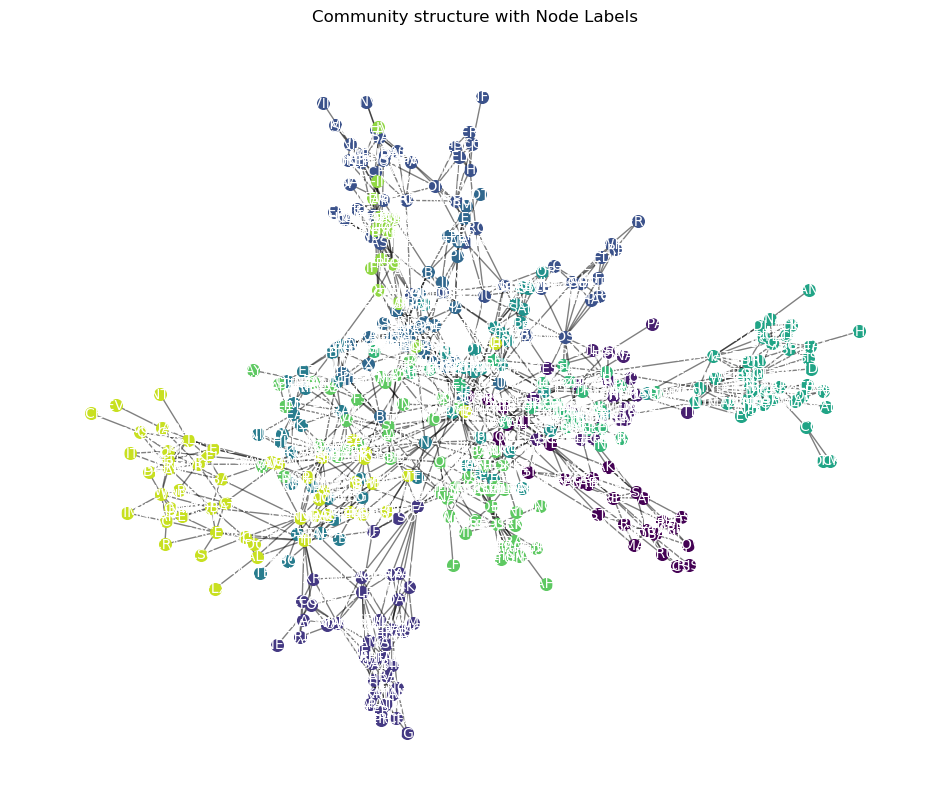

Graph saved as C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\spearman_community_MP.gml
Community data saved as C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\spearman_community_MP_communities.xlsx


{0: ['360ONE',
  'RBL',
  'BSE',
  'CENTRUM',
  'DCBBANK',
  'HISARMETAL',
  'INDBANK',
  'INVENTURE',
  'MEGASOFT',
  'POLYCAB',
  'STEL',
  'SUPRAJIT',
  'TFCILTD',
  'VARROC',
  'CONTROLPR',
  'EVEREADY',
  'JMA',
  'JSWSTEEL',
  'MANAKCOAT',
  'MARUTI',
  'NSIL',
  'PGEL',
  'SSWL',
  'UNIVCABLES',
  'WIPRO',
  'CGPOWER',
  'RELCAPITAL',
  'CRISIL',
  'TCS'],
 9: ['KTKBANK',
  'AURUM',
  'BANCOINDIA',
  'BBL',
  'BFINVEST',
  'DHANI',
  'GET&D',
  'IDBI',
  'IDFCFIRSTB',
  'INDOTECH',
  'IVC',
  'JAMNAAUTO',
  'JBMA',
  'NELCAST',
  'PFS',
  'SARDAEN',
  'SMCGLOBAL',
  'TATAMOTORS',
  'YESBANK',
  'AARON',
  'ASHOKLEY',
  'BAJAJFINSV',
  'CUB',
  'CYIENT',
  'DELTAMAGNT',
  'DHUNINV',
  'DPWIRES',
  'ELECTCAST',
  'FEDERALBNK',
  'HDFCAMC',
  'INDIANCARD',
  'JWL',
  'KIRLOSENG',
  'KSOLVES',
  'PIDILITIND',
  'SECURKLOUD',
  'SUMMITSEC',
  'TIMESGTY',
  'KENNAMET',
  'AAVAS',
  'CHOLAHLDNG',
  'GEEKAYWIRE',
  'ICICIGI',
  'INOXWIND',
  'LTIM',
  'MMFL',
  'TRITURBINE',
  'WINDMACH

In [164]:
import matplotlib.pyplot as plt
import networkx as nx
import community as community_louvain

def detect_and_plot_communities(G, save_gml=False, save_excel = False, filename="graph.gml"):
    """
    Detects communities in a graph using the Louvain method, plots the graph with nodes colored by community
    and with node labels, and optionally saves the graph to a GML file.

    Parameters:
    G (nx.Graph): A NetworkX graph.
    save_gml (bool): Whether to save the graph to a GML file.
    filename (str): Filename for the GML file.

    Returns:
    dict: A dictionary of nodes with their community assignments.
    """
    # Detect communities
    partition = community_louvain.best_partition(G)

    # Add community information as node attribute for saving
    for node, community in partition.items():
        G.nodes[node]['community'] = community

    # Visualization setup
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(G)  # positions for all nodes

    # Color the nodes according to their partition
    cmap = plt.get_cmap('viridis')
    num_communities = len(set(partition.values()))
    colors = [cmap(i / num_communities) for i in range(num_communities)]

    for com in set(partition.values()):
        list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size=70, node_color=colors[com])
    
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')  # Adding labels to nodes

    plt.title('Community structure with Node Labels')
    plt.axis('off')
    plt.show()
    
    # Inverting the partition dictionary to community: [nodes]
    community_dict = {}
    for node, com in partition.items():
        if com not in community_dict:
            community_dict[com] = []
        community_dict[com].append(node)

    # Save to GML file if requested
    if save_gml:
        nx.write_gml(G, filename)
        print(f"Graph saved as {filename}")


    if save_excel:
        excel_filename = filename.replace('.gml', '_communities.xlsx')
        # Create a DataFrame from the community dictionary
        df = pd.DataFrame.from_dict(community_dict, orient='index').transpose()
        # Save the DataFrame to an Excel file
        df.to_excel(excel_filename, index=False)
        print(f"Community data saved as {excel_filename}")
    return community_dict

# Example usage
# Assuming 'G' is your graph
detect_and_plot_communities(MP, save_gml=True, save_excel= True, filename=r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\spearman_community_MP.gml")


This snippet of code:

1. creates different graphs according to the threshold values given
2. saves the graphs in gml files in specific directories.

In [6]:
"""Threshold values of 0.2 for cross and spearman matrix and 0.02 for mi matrix"""


import os
import networkx as nx
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

def invert_sector_dict(sector_company_dict):
    # Given a dictionary of sector to companies, invert it to a company to sector mapping
    stock_sector_map = {}
    for sector, stocks in sector_company_dict.items():
        for stock in stocks:
            stock_sector_map[stock] = sector
    return stock_sector_map

def load_correlation_matrix(file_path):
    df = pd.read_excel(file_path, index_col=0)
    return df

def create_graph_from_correlation(df, stock_sector_map):
    G = nx.Graph()
    df.columns = df.columns.str.strip()
    df.index = df.index.str.strip()
    
    for i in df.index:
        for j in df.columns:
            if i != j and abs(df.loc[i,j]) >= 0.02:
                G.add_edge(i, j, weight=1 - abs(df.loc[i, j]))

    for node in G.nodes():
        G.nodes[node]['sector'] = stock_sector_map.get(node, 'Unknown')
    return G


thresholds = [0.01, 0.02, 0.03]  # Define thresholds
graphs = []


def save_to_gml(G, output_dir):
    filename = "mutual_information_thres_03_with_attributes.gml"
    file_path = os.path.join(output_dir, filename)
    nx.write_gml(G, file_path)
    print(f"Graph saved as {file_path}")

# Example usage


# Load the Excel file containing the correlation matrix
file_path = r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\mutual_information_matrix.xlsx"
df = load_correlation_matrix(file_path)
output_dir = r'C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix'

# Invert the sector dictionary to map stocks to sectors
stock_sector_map = invert_sector_dict(sector_company_dict)

# Create the graph, compute MST, and save
G = create_graph_from_correlation(df, stock_sector_map)



#save_to_gml(G, output_dir)

TypeError: create_graph_from_correlation() missing 1 required positional argument: 'threshold'

This snippet of script:

1. Plots the degree distribution for the graphs produced by the Threshold method in a single graph.

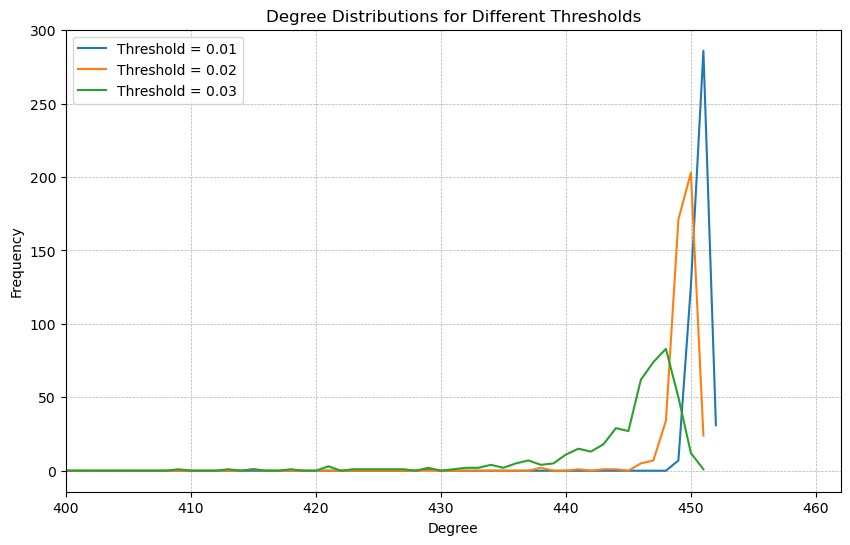

In [5]:
import os
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def invert_sector_dict(sector_company_dict):
    # Invert a dictionary of sector to companies to a company to sector mapping
    stock_sector_map = {}
    for sector, stocks in sector_company_dict.items():
        for stock in stocks:
            stock_sector_map[stock] = sector
    return stock_sector_map

def load_correlation_matrix(file_path):
    # Load a correlation matrix from an Excel file
    try:
        df = pd.read_excel(file_path, index_col=0)
        return df
    except Exception as e:
        print(f"Failed to load file: {file_path}. Error: {e}")
        return pd.DataFrame()  # Return an empty DataFrame on failure

def create_graph_from_correlation(df, stock_sector_map, threshold):
    # Create a graph based on the correlation matrix with a given threshold
    G = nx.Graph()
    if df.empty:
        return G  # Return an empty graph if df is empty
    df.columns = df.columns.str.strip()
    df.index = df.index.str.strip()
    
    for i in df.index:
        for j in df.columns:
            if i != j and abs(df.loc[i, j]) >= threshold:
                G.add_edge(i, j, weight=1 - abs(df.loc[i, j]))

    for node in G.nodes():
        G.nodes[node]['sector'] = stock_sector_map.get(node, 'Unknown')
    return G

def plot_degree_distribution(thresholds, graphs):
    plt.figure(figsize=(10, 6))
    for threshold, graph in zip(thresholds, graphs):
        degrees = [d for n, d in graph.degree()]
        max_degree = max(degrees) if degrees else 0
        degree_counts = np.bincount(degrees, minlength=max_degree+1)
        
        # Plot only the range from 400 onwards
        range_start = 400
        plt.plot(range(range_start, len(degree_counts)), degree_counts[range_start:], label=f'Threshold = {threshold}')
        
    plt.title('Degree Distributions for Different Thresholds')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Set appropriate x-axis limits
    plt.xlim(400, max(len(degree_counts)+10, 400))
    
    plt.savefig(r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\degree_distributions_thres.png")  # Save the figure as a PNG file
    plt.show()


# Example usage
file_path = r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix\mutual_information_matrix.xlsx"
df = load_correlation_matrix(file_path) 
stock_sector_map = invert_sector_dict(sector_company_dict)
output_dir = r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\mi_matrix"

thresholds = [0.01, 0.02, 0.03]  # Define thresholds
graphs = []

for threshold in thresholds:
    G = create_graph_from_correlation(df, stock_sector_map, threshold)
    graphs.append(G)

plot_degree_distribution(thresholds, graphs)


------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------

this snippet of code:

1. selects and choose 5 specified sectors
2. arrange those sectors in an order in a dataframe
3. selects the valid stocks under those 5 sectors
4. saves the correlation values from the main large correlation matrices and create a sub matrices
5. saves those in a specified directory
6. create and plot heatmaps one by one for all the sub matrices

Subset correlation matrix saved to C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\subset_correlation_matrix.xlsx


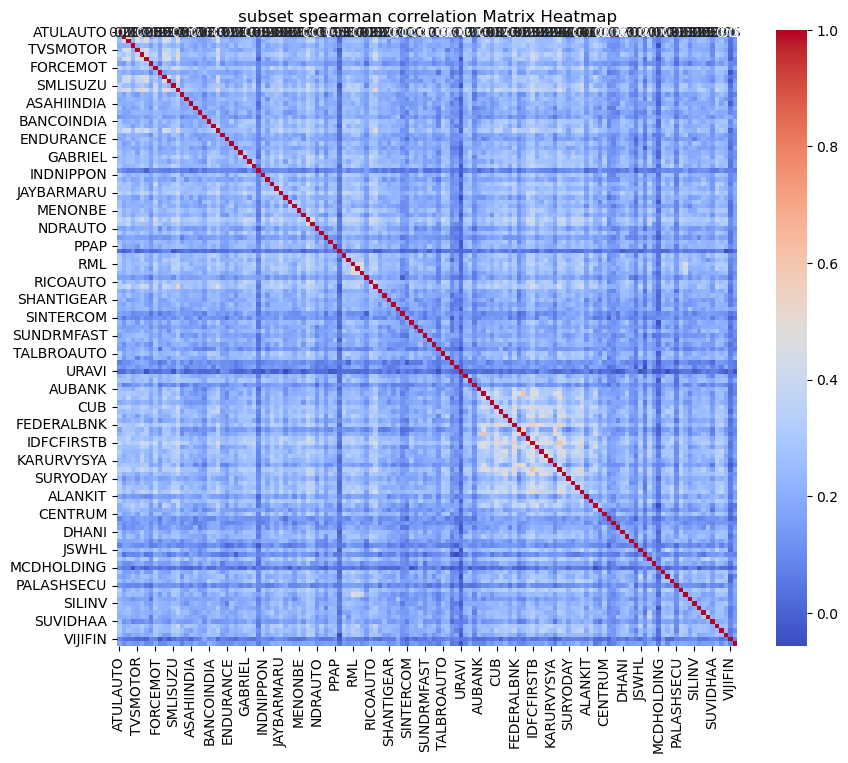

In [21]:
import pandas as pd

# Define the sectors and company mapping
sector_company_dict

# List of sectors to focus on
selected_sectors = ['Auto___2___3_Wheelers', 'Auto___4w', 'Auto_Ancillaries', 'Banks', 'Finance___Investments']

# Gather all companies from the selected sectors in order
ordered_companies = []
for sector in selected_sectors:
    ordered_companies.extend(sector_company_dict[sector])

# Load the full correlation matrix from an Excel file
file_path = r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\spearman_correlation_matrix.xlsx"
full_correlation_matrix = pd.read_excel(file_path, index_col=0)

# Strip any leading and trailing whitespace from the index and columns
full_correlation_matrix.columns = full_correlation_matrix.columns.str.strip()
full_correlation_matrix.index = full_correlation_matrix.index.str.strip()

# Filter to only include companies present in both the list and the DataFrame index/columns
valid_companies = [company for company in ordered_companies if company in full_correlation_matrix.index]

# Create a subset of the correlation matrix for the valid companies
subset_correlation_matrix = full_correlation_matrix.loc[valid_companies, valid_companies]

# Save the subset correlation matrix to a new Excel file
output_file_path = r"C:\Users\anind\Desktop\Indiana University Bloomington\Semester 2\I606 Network Science\Project\Data\rerunning\Project_Auto_and_Finance_Sector_250424\Final_Matrices\spearman_corr_matrix\subset_correlation_matrix.xlsx"
subset_correlation_matrix.to_excel(output_file_path)

print(f"Subset correlation matrix saved to {output_file_path}")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('subset spearman correlation Matrix Heatmap')
plt.savefig(r"C:\Users\anind\Desktop\subset_spearman.png")
plt.show()